In [14]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import scipy.io as sio
from skimage.io import imread, imsave

In [15]:
#Input image
image = imread('./test_data/2.jpg')

In [16]:
# Define our color selection boundaries in RGB values
lower_green = np.array([41,252,46]) 
upper_green = np.array([41,252,46])

In [17]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]


In [18]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

C:\Users\thuan\AppData\Local\Temp/ipykernel_10188/1485593460.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


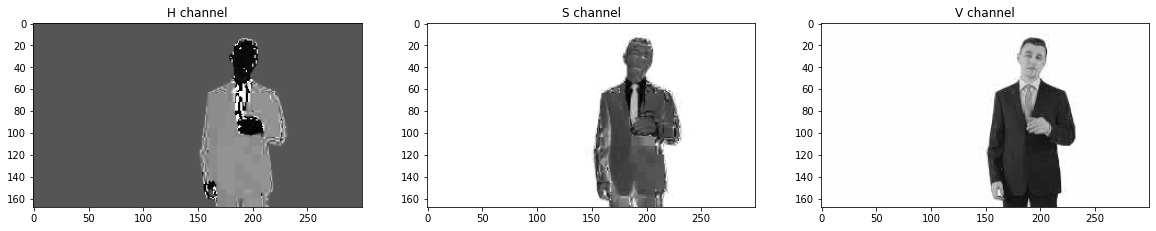

In [19]:
# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

f.show()

In [20]:
#Settting colour limit
lower_green_hue = np.array([52]) 
upper_green_hue = np.array([66])

In [21]:
# Define the masked area
hue_mask = cv2.inRange(h, lower_green_hue, upper_green_hue)

hue_masked_image = np.copy(h)

# Convert image to monotone image (255 = car, 0 = background)
hue_masked_image[hue_mask != 0] = [0]
hue_masked_image[hue_mask == 0] = [255]


# Mask the image to show real object
masked_image = np.copy(image)
masked_image[hue_masked_image == 0] = [0, 0, 0]


In [22]:
background_image = mpimg.imread('./background/5.jpg')

out_height = masked_image.shape[0]
out_width = masked_image.shape[1]

print("{} x {}".format(out_width, out_height))

# Resize the image
background_image = cv2.resize(background_image, image.shape[-2::-1]) 

300 x 168


In [23]:
# Add masked S channel Mask Back
final_image = background_image.copy()
final_image[hue_masked_image != 0] = [0, 0, 0]
final_image = final_image + masked_image

In [24]:
def show_image(img, bg, newimg, n=3):
    f = plt.figure(figsize=(20,20))
   
    f.add_subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Foreground')

    f.add_subplot(1, 3, 2)
    plt.imshow(bg)
    plt.title('Background')

    f.add_subplot(1, 3, 3)
    plt.imshow(newimg)
    plt.title('Result')

    plt.show(block=True)

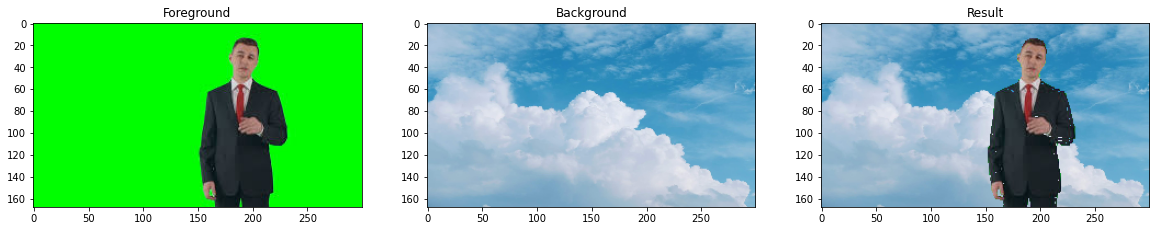

In [25]:
show_image(image, background_image, final_image)

In [26]:
#Write Image
imsave('./output/RGB (2).jpg', final_image)